# Pandas: DataFrames.

<p xmlns:cc="http://creativecommons.org/ns#" xmlns:dct="http://purl.org/dc/terms/"><a property="dct:title" rel="cc:attributionURL" href="https://github.com/luiggix/HeCompA/tree/main/Tutoriales">Tutoriales</a> by <a rel="cc:attributionURL dct:creator" property="cc:attributionName" href="https://www.macti.unam.mx">Luis M. de la Cruz</a> is licensed under <a href="http://creativecommons.org/licenses/by-sa/4.0/?ref=chooser-v1" target="_blank" rel="license noopener noreferrer" style="display:inline-block;">Attribution-ShareAlike 4.0 International<img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1"><img style="height:22px!important;margin-left:3px;vertical-align:text-bottom;" src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1"></a></p> 

# Objetivos.
Revisar los concepto básicos de DataFrame de la biblioteca Pandas.

# Pandas

- Pandas es "Python Data Analysis Library". El nombre proviene del término *Panel Data* que es un término econométrico para manejar conjuntos de datos multidimensionales.

- Pandas es una biblioteca que provee de herramientas de alto desempeño, fáciles de usar, para manejar estructuras de datos y para su análisis. 

- Pandas es un módulo que reúne las capacidades de Numpy, Scipy y Matplotlib.

- Véase https://pandas.pydata.org/ para más información.


In [1]:
import numpy as np
import pandas as pd

# DataFrames

- La idea principal de los DaraFrames se basa en las hojas de cálculo.
- La estructura de un DataFrame es una tabla, similar a las hojas de cálculo.
- Contiene una colección ordenada de columnas.
- Cada columna consiste de un tipo de dato único.
- Pero, diferentes columnas pueden tener diferens tipos: la primera columna podría contener cadenas, la segunda flotantes, la tercera Boleanos, etc.
- También tiene una columna de índice: es como un diccionario de Series con un índice común.


In [2]:
np.arange(12).reshape(4,3)  # Un arreglo de 4 x 3

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [3]:
# Mi primer DataFrame
dframe = pd.DataFrame(np.arange(12).reshape(4,3))

In [4]:
dframe

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


En este ejemplo `dframe` se construye convirtiendo un arreglo multidimensional de **numpy** con la forma 4 renglones X 3 columnas, en un objeto de tipo DataFrame, pre-llenado con los valores del 0 al 11. Los índices por omisión de los renglones van de 0 a 3 y los de las columnas de 0 a 2.  

In [5]:
type(dframe)

pandas.core.frame.DataFrame

## Construir un DataFrame a partir de un diccionario

In [6]:
datos = {'Delegación':['Coyoacán','Tlalpan','Xochimilco'],
         'Población':[837000,3880000,8400000]}
delegaciones = pd.DataFrame(datos)
delegaciones

,Delegación,Población
0,Coyoacán,837000
1,Tlalpan,3880000
2,Xochimilco,8400000


Observa que se construyen dos columnas, una para `Delegación` y otra para `Población`, las cuales son las *Keys* del diccionario.

Otra manera de construir el DataFrame es usando los nombres de la delegaciones como índices de cada renglón:

In [7]:
delegaciones = pd.DataFrame(datos['Población'], index = datos['Delegación'])
delegaciones

,0
Coyoacán,837000
Tlalpan,3880000
Xochimilco,8400000


También es posible poner un nombre a cada columna de manera explícita para una mejor identificación:

In [8]:
delegaciones = pd.DataFrame(datos['Población'], columns = ['Población'], index = datos['Delegación'])
delegaciones

,Población
Coyoacán,837000
Tlalpan,3880000
Xochimilco,8400000


## Agregar una Serie a un DataFrame

Supongamos que tenemos los datos del **Índice Metropolitano de Calidad del Aire** ([IMECAS](https://es.wikipedia.org/wiki/%C3%8Dndice_metropolitano_de_la_calidad_del_aire), para cada delegación. Es posible agregar esta información al DataFrame existente:

In [9]:
# Primero creamos una serie
IMECAS = pd.Series([90,100,120], index = datos['Delegación'])
print(type(IMECAS))
print(IMECAS)

<class 'pandas.core.series.Series'>
Coyoacán       90
Tlalpan       100
Xochimilco    120
dtype: int64


In [10]:
# Agregamos una nueva columna al DataFrame
delegaciones['Cal. Aire'] = IMECAS
delegaciones

,Población,Cal. Aire
Coyoacán,837000,90
Tlalpan,3880000,100
Xochimilco,8400000,120


Observa que la nueva columna, en este caso almacenada originalmente en una serie, debe tener los mismos índices que el DataFrame donde se va a agregar.

Se puede agregar directemente desde una lista (la longitud de la lista debe ser igual al número de renglones):

In [11]:
delegaciones['Autos'] = [10000,20000,15000]

In [12]:
delegaciones

,Población,Cal. Aire,Autos
Coyoacán,837000,90,10000
Tlalpan,3880000,100,20000
Xochimilco,8400000,120,15000


## Leyendo información de archivos *txt*

In [13]:
df_pets = pd.read_table('./pets.txt',sep=' ')
df_pets

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


## Leyendo archivos *csv*

In [14]:
# Lectura de CSV, ojo, en este caso la separación de los datos es con ;
red_wine = pd.read_csv('./winequality-red.csv',sep=';') 
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Formatos de archivos, para lectura y escritura.

Pandas ofrece una multitud de herramientas para leer y guardar información en diferentes formatos: txt, csv, xlsx, json, hdf5, etc.
La información completa de estas herramientas la puedes encontrar en el siguiente enlace: [IO tools](https://pandas.pydata.org/docs/user_guide/io.html).

Por ejemplo, guardar la información del DataFrame `red_wine` en un archivo tipo MS Excel se hace de la siguiente manera:

In [15]:
red_wine.to_excel('./winequality-red.xlsx')

Y para leer la información del archio tipo MS Excel hacemos lo siguiente:

In [16]:
red_wine_excel = pd.read_excel('./winequality-red.xlsx')
red_wine_excel

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


<div class="alert alert-danger">
<b>Observación.</b>
Algunos de estos formatos requieren de la instalación de bibliotecas adicionales.
</div>



## Un primer vistazo a la información: `head`, `tail`, `columns`, `index`, `loc`, `iloc`

In [17]:
red_wine.head() # Revisar los primeros 5 renglones del DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
red_wine.head(10) # Revisar los primeros 10 renlgones del DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [19]:
red_wine.tail() # Revisar los últimos 5 renglones del DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [20]:
red_wine.tail(10) # Revisar los últimos 10 renglones del DataFrame

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [21]:
red_wine.columns # Conocer las columnas

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
red_wine.index # Conocer los índices

RangeIndex(start=0, stop=1599, step=1)

In [23]:
#list(red_wine.index) # En forma de lista

In [24]:
red_wine['alcohol'] # Acceder a los datos de una columna

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [25]:
red_wine.alcohol # Otra manera de acceder a los datos de una columna

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [26]:
red_wine.iloc[3]  # Renglón con índice 3

fixed acidity           11.200
volatile acidity         0.280
citric acid              0.560
residual sugar           1.900
chlorides                0.075
free sulfur dioxide     17.000
total sulfur dioxide    60.000
density                  0.998
pH                       3.160
sulphates                0.580
alcohol                  9.800
quality                  6.000
Name: 3, dtype: float64

In [27]:
red_wine.iloc[[3, 6]] # Extrae parte del DataFrame: renglones 3 y 6

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5


In [28]:
type(red_wine.iloc[[3, 6]]) # Esto es un DataFrame

pandas.core.frame.DataFrame

In [29]:
red_wine.iloc[3:8] # Slicing

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [30]:
# Se obtienen 6 renglones, de 3 a 9, luego solo se muestran los que tienen True
red_wine.iloc[3:10].iloc[ [True, True, False, False, True, False, True] ]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [31]:
# Se puede usar una función anónima para obtener ciertos renglones
red_wine.iloc[lambda x: x.index % 5 == 0] # Solo aquellos múltiplos de 5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
10,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.2,5
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1575,7.5,0.52,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,6
1580,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9,6
1585,7.2,0.39,0.44,2.6,0.066,22.0,48.0,0.99494,3.30,0.84,11.5,6
1590,6.3,0.55,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6


In [32]:
# Se muestran solo aquellos renglones cuya calidad es mayor a 6
# Observa que se usa la función loc().
red_wine.loc[lambda x: x.quality > 6] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [33]:
red_wine.iloc[[0, 2, 5], [1, 3, 7]] # Extracto de renglones y columnas

,volatile acidity,residual sugar,density
0,0.70,1.9,0.9978
2,0.76,2.3,0.9970
5,0.66,1.8,0.9978


In [34]:
red_wine.iloc[2:5, 1:6:2] # Extracto de renglones y columnas

,volatile acidity,residual sugar,free sulfur dioxide
2,0.76,2.3,15.0
3,0.28,1.9,17.0
4,0.70,1.9,11.0


In [35]:
# Solo se muestran algunas columnas
red_wine.iloc[3:8:2, [True, False, True, False, False, True, True, True, False, True, True, True]]

,fixed acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
3,11.2,0.56,17.0,60.0,0.9980,0.58,9.8,6
5,7.4,0.00,13.0,40.0,0.9978,0.56,9.4,5
7,7.3,0.00,15.0,21.0,0.9946,0.47,10.0,7


In [36]:
# Los renglones de 0 a 4, y las columnas 0 y 2
red_wine.iloc[:5, lambda df: [0, 2]]

,fixed acidity,citric acid
0,7.4,0.00
1,7.8,0.00
2,7.8,0.04
3,11.2,0.56
4,7.4,0.00


Se puede usar `loc` si los índices no tienen etiqueta entera:

In [37]:
df = pd.DataFrame({"A": [1, 1, 2, 2], "B": [1, 2, 3, 4],
                   "C": [0.362838, 0.227877, 1.267767, -0.562860],}, 
                  index=['alpha', 'beta', 'gamma', 'delta'])

In [38]:
df

,A,B,C
alpha,1,1,0.362838
beta,1,2,0.227877
gamma,2,3,1.267767
delta,2,4,-0.562860


In [39]:
df.iloc[2]

A    2.000000
B    3.000000
C    1.267767
Name: gamma, dtype: float64

In [40]:
df.loc['gamma']

A    2.000000
B    3.000000
C    1.267767
Name: gamma, dtype: float64

## Agrupación (`groupby`, `describe`, `get_group`, `agg`)

Estas operaciones son de mucha utilidad. Para mostrar su uso vamos a generar un nuevo DataFrame.

In [41]:
demo = pd.DataFrame({"A": [1, 1, 2, 2], 
                     "B": [1, 2, 3, 4],
                     "C": [0.362838, 0.227877, 1.267767, -0.562860],})

In [42]:
demo

,A,B,C
0,1,1,0.362838
1,1,2,0.227877
2,2,3,1.267767
3,2,4,-0.562860


Una función muy útil es `describe()` que proporciona información estadística del DataFrame:

In [43]:
demo.describe()

,A,B,C
count,4.00000,4.000000,4.000000
mean,1.50000,2.500000,0.323905
std,0.57735,1.290994,0.750103
min,1.00000,1.000000,-0.562860
25%,1.00000,1.750000,0.030193
50%,1.50000,2.500000,0.295357
75%,2.00000,3.250000,0.589070
max,2.00000,4.000000,1.267767


Como se puede observar, se muestra por columna la cantidad de elementos (`count`), la media (`mean`), la desviación estándar (`std`), el mínimo (`min`), los cuartiles y el máximo (`max`).

Ahora agrupamos los renglones haciendo una clasificación de acuerdo al valor de la columna `A`.

In [44]:
demo_A = demo.groupby('A')
demo_A

Observa que el objeto `demo_A` no es un objeto de tipo `DataFrame`, es un objeto de tipo `DataFrameGroupBy`. Para obtener una descripción del objeto `demo_A` hacemos lo siguiente:

In [45]:
demo_A.describe()

B                                               C                      \
  count mean       std  min   25%  50%   75%  max count      mean       std   
A                                                                             
1   2.0  1.5  0.707107  1.0  1.25  1.5  1.75  2.0   2.0  0.295357  0.095432   
2   2.0  3.5  0.707107  3.0  3.25  3.5  3.75  4.0   2.0  0.352454  1.294449   

                                                     
        min       25%       50%       75%       max  
A                                                    
1  0.227877  0.261617  0.295357  0.329098  0.362838  
2 -0.562860 -0.105203  0.352453  0.810110  1.267767

Observa que se muestra la misma información que antes, pero esta vez es por cada categoría de la clasificación.

Podemos obtener los grupos de la clasificación como sigue:

In [46]:
demo_A.get_group(1)

,A,B,C
0,1,1,0.362838
1,1,2,0.227877


In [47]:
demo_A.get_group(2)

,A,B,C
2,2,3,1.267767
3,2,4,-0.562860


Cada grupo es un DataFrame:

In [48]:
type(demo_A.get_group(1))

pandas.core.frame.DataFrame

Es posible usar la función `agg` para "agregar" una función para que se aplique sobre un DataFrame o una agrupación:

In [49]:
demo.agg('min') # La función min() se aplica sobre cada columa del DataFrame

A    1.00000
B    1.00000
C   -0.56286
dtype: float64

In [50]:
demo_A.agg('min') # La función min() se aplica sobre cada grupo.

,B,C
A,,
1,1,0.227877
2,3,-0.562860


Veamos otras funciones:

In [51]:
demo_A.agg('max')

,B,C
A,,
1,2,0.362838
2,4,1.267767


In [52]:
demo_A.mean()

,B,C
A,,
1,1.5,0.295357
2,3.5,0.352454


Podemos definir nuestra propia función a aplicar:

In [53]:
def difMaxMin(arr):
    """
    Calcula la diferencia entre el valor mínimo y máximo de un arreglo.
    """
    return arr.max() - arr.min()

In [54]:
demo_A.agg(difMaxMin) # Ahora aplicamos nuestra función

,B,C
A,,
1,1,0.134961
2,1,1.830627


Podemos usar una función anónima:

In [55]:
demo_A.agg(lambda arr: arr.max() - arr.min())

,B,C
A,,
1,1,0.134961
2,1,1.830627


Apliquemos lo anterior al DataFrame `red_wine`

In [56]:
red_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [57]:
wino = red_wine.groupby('quality')

In [58]:
wino.describe() 

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [59]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [60]:
wino.agg(difMaxMin)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [61]:
wino_5 = wino.get_group(5)
wino_5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1582,6.1,0.715,0.10,2.6,0.053,13.0,27.0,0.99362,3.57,0.50,11.9,5
1583,6.2,0.460,0.29,2.1,0.074,32.0,98.0,0.99578,3.33,0.62,9.8,5
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5


Podemos aplicar algunas funciones a una columna particular

In [62]:
wino_5['fixed acidity'].mean()

np.float64(8.167254038179149)

In [63]:
wino_5['fixed acidity'].agg('mean')

np.float64(8.167254038179149)

In [64]:
wino_5['fixed acidity'].agg(difMaxMin)

np.float64(10.9)

## Agregando una columna a nuestro DataFrame

In [65]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Agregamos una nueva columna realizando un cálculo entre valores de otras columnas

In [66]:
red_wine['qual/alc ratio'] = red_wine['quality'] / red_wine['alcohol']

In [67]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


## Ordenamiento 

Se puede ordenar un DataFrame de acuerdo con los valores de una columna

In [68]:
red_wine.sort_values('alcohol', ascending = False, inplace=True)
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,0.335570
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,0.571429
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,0.428571
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,7.9,0.24,0.40,1.6,0.056,11.0,25.0,0.99670,3.32,0.87,8.7,6,0.689655
528,8.2,0.42,0.49,2.6,0.084,32.0,55.0,0.99880,3.34,0.75,8.7,6,0.689655
1436,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5,0.588235
544,14.3,0.31,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6,0.714286


## Contar elementos.

Se puede contar el número de elementos que tengan un cierto valor en cada columna.

In [69]:
red_wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

## Estilo de despliegue

In [70]:
wino_5.loc[10:25].style.background_gradient(cmap='summer')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
10,6.700000,0.580000,0.080000,1.800000,0.097000,15.000000,65.000000,0.995900,3.280000,0.540000,9.200000,5
11,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,5
12,5.600000,0.615000,0.000000,1.600000,0.089000,16.000000,59.000000,0.994300,3.580000,0.520000,9.900000,5
13,7.800000,0.610000,0.290000,1.600000,0.114000,9.000000,29.000000,0.997400,3.260000,1.560000,9.100000,5
14,8.900000,0.620000,0.180000,3.800000,0.176000,52.000000,145.000000,0.998600,3.160000,0.880000,9.200000,5
15,8.900000,0.620000,0.190000,3.900000,0.170000,51.000000,148.000000,0.998600,3.170000,0.930000,9.200000,5
17,8.100000,0.560000,0.280000,1.700000,0.368000,16.000000,56.000000,0.996800,3.110000,1.280000,9.300000,5
21,7.600000,0.390000,0.310000,2.300000,0.082000,23.000000,71.000000,0.998200,3.520000,0.650000,9.700000,5
22,7.900000,0.430000,0.210000,1.600000,0.106000,10.000000,37.000000,0.996600,3.170000,0.910000,9.500000,5
23,8.500000,0.490000,0.110000,2.300000,0.084000,9.000000,67.000000,0.996800,3.170000,0.530000,9.400000,5


Existen varios tipos de desplique del DataFrame, revisa [Table Visualization](https://pandas.pydata.org/docs/user_guide/style.html) para más detalles.

## Visualización

Pandas contiene herramientas para graficación que se basan en matplotlib.

### Graficación de Series.

In [71]:
# Un DataFrame con datos pseudo-aleatorios.
df_ts = pd.Series(np.random.randn(1000), 
               index=pd.date_range("1/1/2000", periods=1000))
df_ts

2000-01-01   -0.446124
2000-01-02    0.750819
2000-01-03   -0.607269
2000-01-04    0.287860
2000-01-05    0.414593
                ...   
2002-09-22   -0.192490
2002-09-23    0.429665
2002-09-24    0.221768
2002-09-25   -0.258193
2002-09-26   -0.540225
Freq: D, Length: 1000, dtype: float64

<Axes: >

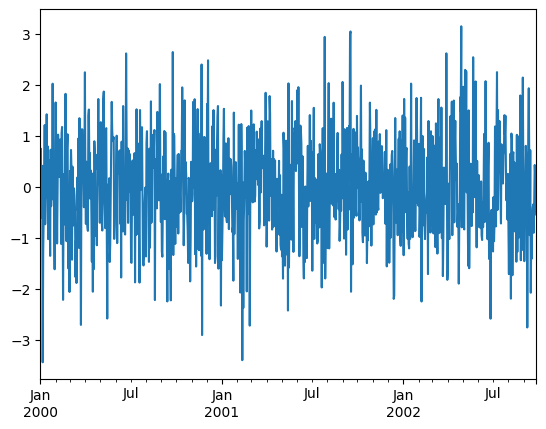

In [72]:
df_ts.plot()

In [73]:
df_ts_cs = df_ts.cumsum()
df_ts_cs

2000-01-01    -0.446124
2000-01-02     0.304695
2000-01-03    -0.302575
2000-01-04    -0.014715
2000-01-05     0.399878
                ...    
2002-09-22   -11.027506
2002-09-23   -10.597841
2002-09-24   -10.376073
2002-09-25   -10.634266
2002-09-26   -11.174491
Freq: D, Length: 1000, dtype: float64

<Axes: >

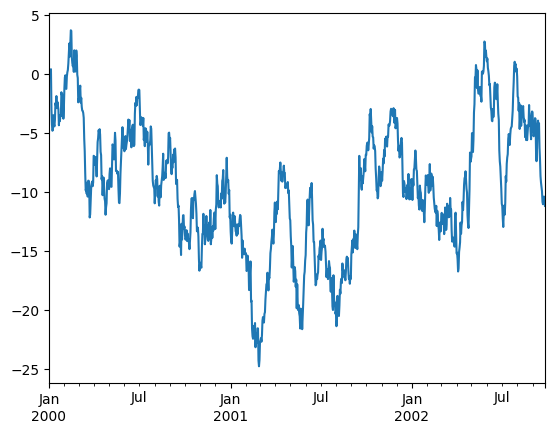

In [74]:
df_ts_cs.plot()

### Graficación de DataFrames.

Véase [Chart visualization](https://pandas.pydata.org/docs/user_guide/visualization.html) para más detalles.

<Axes: xlabel='quality', ylabel='alcohol'>

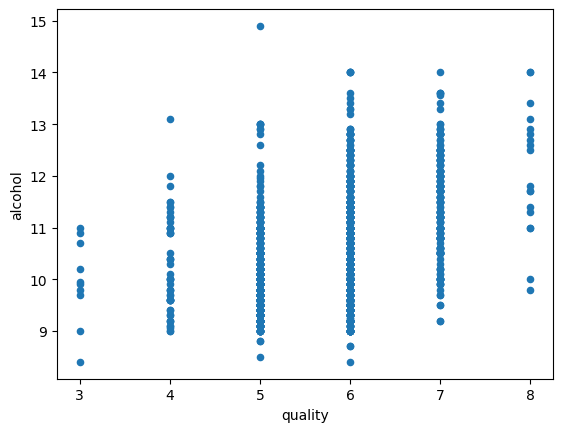

In [75]:
red_wine.plot(kind='scatter', x='quality', y='alcohol')

In [76]:
dummy_df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
dummy_df

,a,b,c,d
0,0.665959,0.390329,0.179215,0.886390
1,0.789558,0.954895,0.676213,0.536752
2,0.751980,0.532581,0.636709,0.743796
3,0.932110,0.573749,0.224022,0.844338
4,0.772815,0.771968,0.510158,0.531502
5,0.394542,0.310952,0.638091,0.037983
6,0.217230,0.359340,0.329200,0.588960
7,0.249074,0.963388,0.315064,0.814612
8,0.578325,0.855955,0.065966,0.312847
9,0.492875,0.898160,0.884653,0.341470


<Axes: >

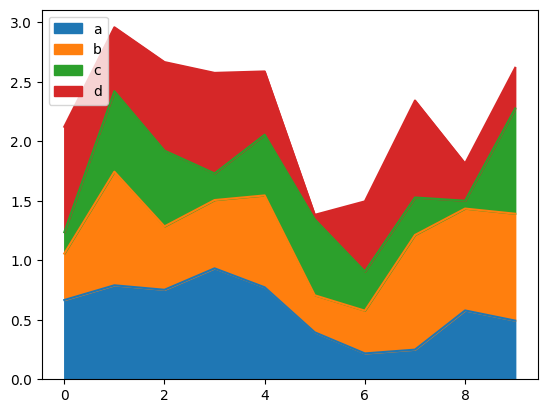

In [77]:
dummy_df.plot.area()

<Axes: >

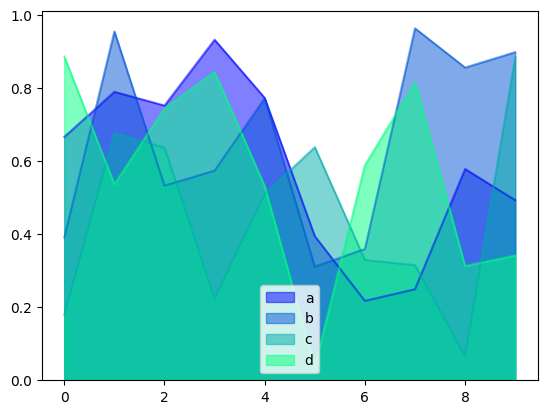

In [78]:
dummy_df.plot.area(stacked=False, colormap='winter')

In [79]:
dummy_df.iloc[:,1:3]

,b,c
0,0.390329,0.179215
1,0.954895,0.676213
2,0.532581,0.636709
3,0.573749,0.224022
4,0.771968,0.510158
5,0.310952,0.638091
6,0.359340,0.329200
7,0.963388,0.315064
8,0.855955,0.065966
9,0.898160,0.884653


array([<Axes: ylabel='b'>, <Axes: ylabel='c'>], dtype=object)

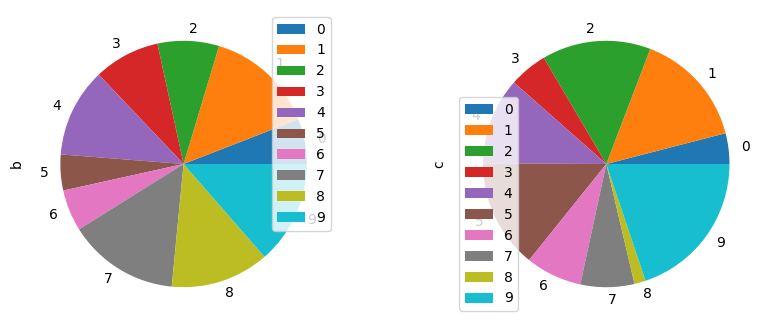

In [80]:
dummy_df.iloc[:,1:3].plot.pie(subplots=True,figsize=(10,4))

array([<Axes: ylabel='b'>, <Axes: ylabel='c'>], dtype=object)

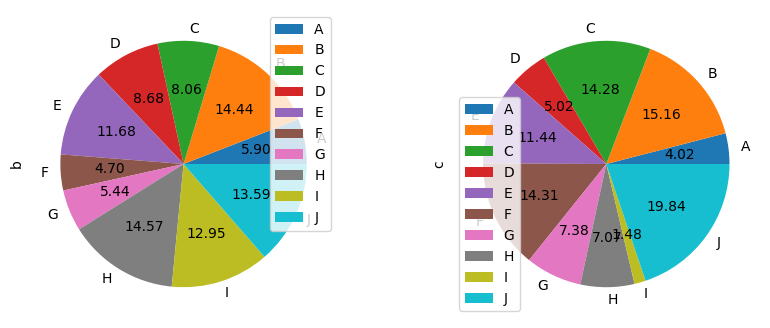

In [81]:
dummy_df.iloc[:,1:3].plot.pie(subplots=True,figsize=(10,4), 
                        labels=['A','B','C','D','E','F','G','H', 'I', 'J'], 
                        autopct="%.2f",fontsize=10)

In [82]:
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])
df

,a,b,c,d
0,-0.885016,0.719308,-0.291855,0.003630
1,-0.719666,1.518716,2.077696,-1.441801
2,0.425277,2.405413,0.886554,-0.448224
3,0.405194,-0.513183,-0.400329,-1.175449
4,-0.872761,-1.744203,0.564004,0.063672
...,...,...,...,...
995,-2.962234,0.585813,-1.784358,0.073990
996,0.345324,-0.499886,-0.958727,-1.055501
997,0.952228,-1.947517,1.480793,-0.231511
998,-0.685384,-0.819813,0.111405,-1.324061


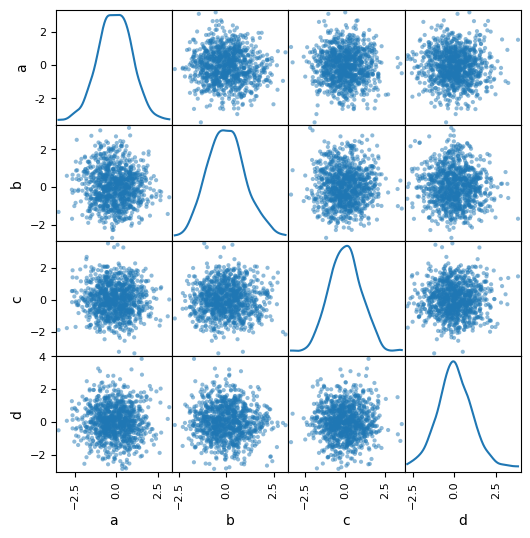

In [83]:
scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal="kde");

#### Parallel Coordinates

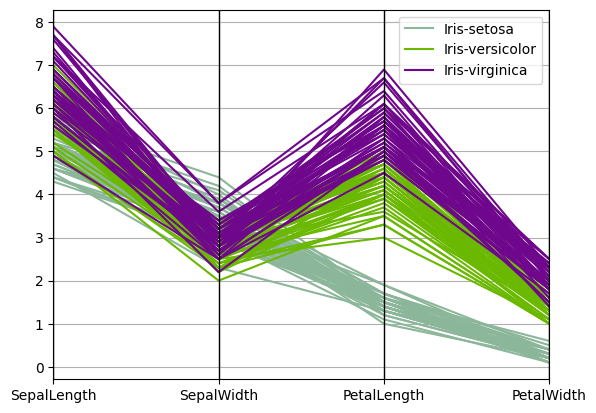

In [84]:
iris_data = pd.read_csv("./iris.data")

pd.plotting.parallel_coordinates(iris_data, "Name");

#### RadViz

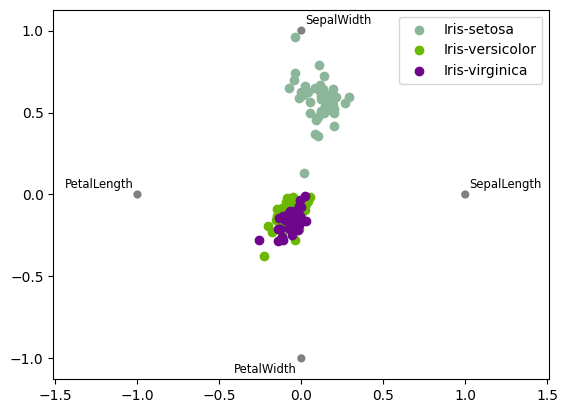

In [85]:
pd.plotting.radviz(iris_data, "Name");

#### Andrews curves

<Axes: >

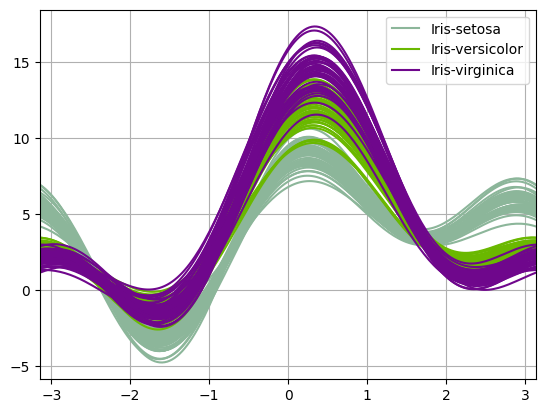

In [86]:
pd.plotting.andrews_curves(iris_data, "Name")

#### Combinando con Matplotlib

In [87]:
precio = pd.Series(np.random.randn(150).cumsum(), 
                   index=pd.date_range("2000-1-1", periods=150, freq="B"))
precio

2000-01-03    1.321611
2000-01-04    0.256043
2000-01-05    0.268913
2000-01-06    0.141378
2000-01-07   -0.093687
                ...   
2000-07-24    5.596634
2000-07-25    4.943843
2000-07-26    5.187969
2000-07-27    5.073103
2000-07-28    5.174088
Freq: B, Length: 150, dtype: float64

<Axes: >

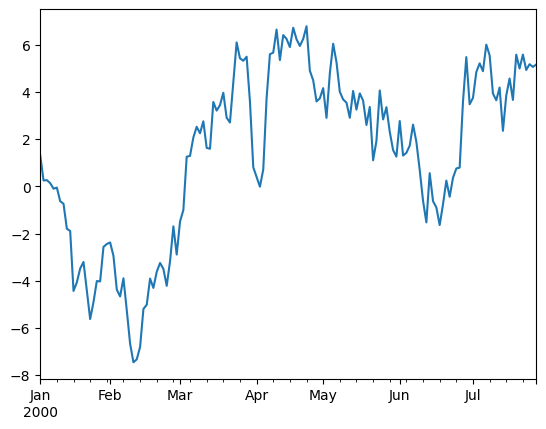

In [88]:
precio.plot()

In [89]:
ma = precio.rolling(14).mean()
mstd = precio.rolling(14).std()
print(ma)
print(mstd)

2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2000-07-24    4.583496
2000-07-25    4.563572
2000-07-26    4.584795
2000-07-27    4.517268
2000-07-28    4.489163
Freq: B, Length: 150, dtype: float64
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2000-07-24    1.017489
2000-07-25    1.006681
2000-07-26    1.017188
2000-07-27    0.943394
2000-07-28    0.915135
Freq: B, Length: 150, dtype: float64


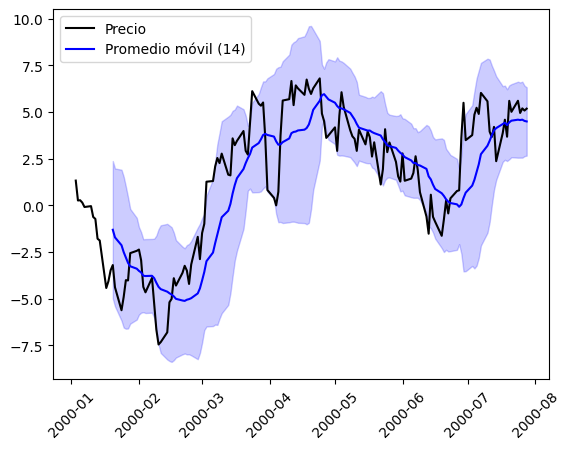

In [90]:
import matplotlib.pyplot as plt
plt.plot(precio.index, precio, "k", label='Precio')
plt.plot(ma.index, ma, "b", label='Promedio móvil (14)')
plt.fill_between(mstd.index, ma - 2 * mstd, ma + 2 * mstd, color="b", alpha=0.2)
plt.xticks(rotation=45)
plt.legend()